In [26]:
import pandas as pd
import os 
import datetime as dt
import numpy as np
from math import floor
import matplotlib.pyplot as plt
from modules.plotting import plot_histogram, plot_pie_chart

In [2]:
fp = os.path.join('data', 'results', 'DEEP_Cleaned_Survey_Responses_S1.csv')
df = pd.read_csv(fp, index_col=0)
display(df.head(3), df.shape)

,Respondent ID,Collector ID,Start Date,End Date,IP Address,language,total_time,How did you learn about the survey?_Response,How did you learn about the survey?_Other,Are you taking this survey online or in person?_Response,...,What industries are people where you live primarily working in? Select up to 3._Transportation,What industries are people where you live primarily working in? Select up to 3._Other,How do people in your community usually hear about job opportunities?_Word of mouth,How do people in your community usually hear about job opportunities?_Online job site,How do people in your community usually hear about job opportunities?_Delaware JobLink,How do people in your community usually hear about job opportunities?_Job Fairs,How do people in your community usually hear about job opportunities?_Employer websites,How do people in your community usually hear about job opportunities?_Temp Agency,How do people in your community usually hear about job opportunities?_I don't know,How do people in your community usually hear about job opportunities?_Other
1,1.185240e+11,452261040.0,01/29/2024 12:51:19 PM,01/29/2024 01:02:56 PM,50.254.172.169,en,697.0,Ci'Aira,NaN,In person,...,0,NaN,0,1,0,0,1,0,0,NaN
2,1.185239e+11,452261040.0,01/29/2024 10:36:37 AM,01/29/2024 10:47:25 AM,73.165.183.94,en,648.0,Michael,NaN,In person,...,0,NaN,1,0,1,0,0,1,0,NaN
3,1.185239e+11,452261040.0,01/29/2024 10:24:19 AM,01/29/2024 10:35:04 AM,73.165.183.94,en,644.0,Michael,NaN,In person,...,0,NaN,0,0,1,0,0,0,0,NaN


(290, 89)

In [3]:
df.columns

Index(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'language', 'total_time',
       'How did you learn about the survey?_Response',
       'How did you learn about the survey?_Other',
       'Are you taking this survey online or in person?_Response',
       'What zip code do you currently live in?_Open',
       'What is your date of birth?_Date',
       'Which of the following best describes you?_Response',
       'What is the highest level of education that you have attained?_Response',
       'Do you hold any professional certifications?_Response',
       'What certifications do you hold?_Open',
       'Are you currently employed?_Response',
       'How many jobs do you currently work at?_Response',
       'What are your current job title(s)_Open',
       'Does your current compensation cover what you need to feel financially comfortable?_Response',
       'What would it take for you to feel like you were earning enough to feel financially comforta

In [ ]:
## WIP: Figure out whether we want to plot by zip code or county 
### Assign zip code to counties 
### Assign zip codes to wilmington 
### Write mapping function for zip code plots 

## **Presentation Outline**
 
[Link](https://docs.google.com/presentation/d/1HSTv5NgdKBrXRzOEiITktw4wbaG_nAib/edit?usp=sharing&ouid=107908789910623442905&rtpof=true&sd=true)

#### **Respondent Demographics**
* Age 
* Race 
* Geography 


Erroneous or NAN DOB Entries


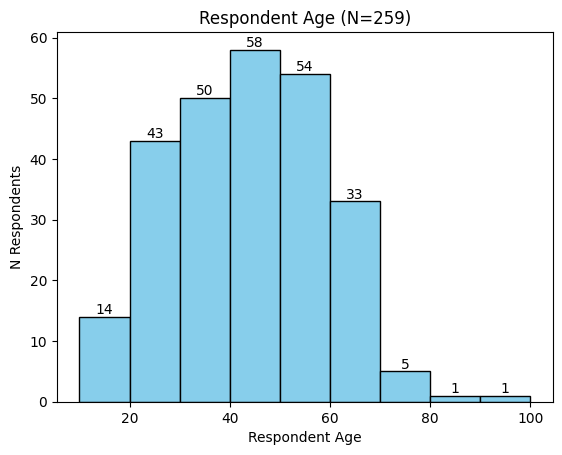

[ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


,Age Range,Count
0,40 to 49,59
1,50 to 59,55
2,30 to 39,51
3,20 to 29,46
4,60 to 69,27
5,10 to 19,15
9,70 and older,6


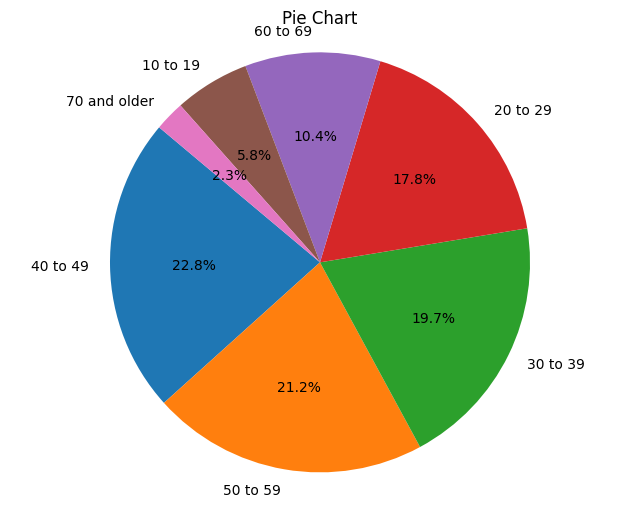

In [41]:
## Age

# cast DOB to dt and subtract from current year
dob_q = 'What is your date of birth?_Date'
current_date = dt.datetime.utcnow().date()
current_date_ts = pd.Timestamp(current_date.year, current_date.month, current_date.day)

if df['What is your date of birth?_Date'].dtype.type == np.object_: 
    df['What is your date of birth?_Date'] = pd.to_datetime(df['What is your date of birth?_Date']) 
df['Age'] = df['What is your date of birth?_Date'].apply(lambda x: np.round((current_date_ts - x).days / 365))

# fill nans and correct errors 
print('Erroneous or NAN DOB Entries')
dob_missing = df[(df['Age'] <= 1) | (df['Age'].isna())][['Respondent ID', dob_q, 'Age']]
df['Age'] = np.where(df['Respondent ID'].isin(dob_missing['Respondent ID']), np.nan, df['Age'])
# display(dob_missing, f"{dob_missing.shape[0]} errors filled with NaN")

# plot histogram 
year_boundaries = list(range(10,109, 10)) # for binning respondent ages 
plot_histogram(df['Age'], 
                 bins=year_boundaries, # or try 10 for decile 
                 xlabel="Respondent Age", 
                 ylabel='N Respondents',
                 edgecolor='black', 
                 title=f'Respondent Age (N={df[~df["Age"].isna()].shape[0]})', 
                 bar_labels=True)

# plot pie chart 
df['Age_bin'] = pd.cut(df['Age'], bins=year_boundaries)\
    .apply(lambda x: f"{x.left} to {x.right - 1}")
v_counts = df['Age_bin'].value_counts().reset_index().rename({"Age_bin":"Age Range",'count':'Count'}, axis=1)
count_over_70 = v_counts.iloc[-3:, -1].sum()
v_counts.loc[len(v_counts.index)] = ['70 and older',count_over_70]
v_counts = v_counts[~v_counts.index.isin([6,7,8])]
display(v_counts)
plot_pie_chart(v_counts, label_column='Age Range', count_column='Count')

# Race 
# Geography 

In [20]:
df[df['Age'] == 91]['Age_bin']

123    NaN
Name: Age_bin, dtype: category
Categories (8, interval[int64, right]): [(10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80] < (80, 90]]

In [64]:
df[df['Age'] <= 0][['Respondent ID', dob_q]]

,Respondent ID,What is your date of birth?_Date
7,1.185215e+11,2068-06-04
34,1.185115e+11,2024-01-12
46,1.185065e+11,2024-01-05
47,1.185065e+11,2024-01-05
57,1.184985e+11,2023-12-20
63,1.184949e+11,2023-12-15
75,1.184826e+11,2023-11-30
82,1.184823e+11,2023-11-30
85,1.184816e+11,2023-11-29
89,1.184815e+11,2023-11-29


In [25]:
df['What is your date of birth?_Date']

1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
       ..
286   NaN
287   NaN
288   NaN
289   NaN
290   NaN
Name: What is your date of birth?_Date, Length: 290, dtype: float64

In [17]:
from datetime import datetime

date_string = '03/08/1980'
format_string = '%m/%d/%Y'

try:
    parsed_date = datetime.strptime(date_string, format_string)
    print("Parsed date:", parsed_date)
except ValueError:
    print("Error: Unable to parse the date. The format might be incorrect.")


Parsed date: 1980-03-08 00:00:00


#### **Respondent Educational History**
* Highest educational attainment 
    * By geography, race, age 
* Training Experience
    * How many participated in trainings
    * By topic 
    * Feedback 


#### **Respondent Employment Status**

* Current status (employed/unemployed)
    * By geography, age, educational attainment 
* Job Type 
    * By geography, age, educatinoal attainment
    

#### **Respondent Employment History**

* By geography 
* By type of job 

#### **Respondent Training Experience**

* By geography 
* By educational attainment 
* By current job 

#### **Respondent Unemployment Benefits**

* Reasons for not applying (people currently unemployed)


#### **Job Search Tools and Trends**

* trends by ideal job type

#### **Respondent Ideal Employment**

* By education 
* By training experience 
* By training desire 
* By current job type 

#### **Respondent Barriers to Employment**
* by education 
* by geography 
* by ideal job type 


#### **Skills Area Strengths**
* by education
* by ideal job 
* by training experience
* by training desires 


#### **Skills Area Gaps**
* by education
* by ideal job 
* by training experience
* by training desires 
